[Oregon Curriculum Network](http://4dsolutions.net/ocn/)

# The School of Tomorrow


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/49966665628/in/dateposted-public/" title="IVM FM (4-frequency)"><img src="https://live.staticflickr.com/65535/49966665628_52648be9e3_c.jpg" width="800" height="424" alt="IVM FM (4-frequency)"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

(scroll down for embedded source code and more remarks about its runtime context)

[Home Page](School_of_Tomorrow.ipynb)

# Blender

[View on nbviewer](https://nbviewer.jupyter.org/github/4dsolutions/School_of_Tomorrow/blob/master/blender.ipynb)

When it comes to XYZ coordinates and 3D graphics, what tool might we use?  The answer is pretty obvious:  [Blender](http://blender.org) of course.

But then do you have the Personal Workspace (PWS) you need, equipped with the necessary hardware?  Perhaps you're not interested enough to want a dedicated workspace all your own and that's OK.  A friend might let you test drive from time to time.  Check it out.  Try (test the waters) before you buy (dive in).

Blender is free open source so don't take this as a sales pitch in the conventional sense.  I'm not selling Blender.  I am selling using Quadrays inside of Blender, why not?

```python
import bpy
from qrays import Qvector

from itertools import permutations
g = permutations((2,1,1,0))

ORIGIN_IVM = Qvector((0,0,0,0))
# set comprehension in list comprehension
SPOKES_IVM = [Qvector(v) for v in {p for p in g}]  
ORIGIN_XYZ = ORIGIN_IVM.xyz().xyz # (0,0,0)

c6xty_ball = bpy.ops.mesh.primitive_ico_sphere_add
c6xty_ball(radius=0.5, enter_editmode=False, location=ORIGIN_XYZ)
bpy.ops.object.shade_smooth()

for qv in SPOKES_IVM:
    xyz = qv.xyz().xyz
    c6xty_ball(radius=0.5, enter_editmode=False, location=xyz)
    bpy.ops.object.shade_smooth()

```

Don't expect the above source code to "just work" in this context, here in a Jupyter Notebook on Github or one of those.  

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/49962483976/in/dateposted-public/" title="Blender [C__Users_Kirby_Documents_C6XTY_ivm_fm.blend] 6_1_2020 11_47_31 PM"><img src="https://live.staticflickr.com/65535/49962483976_a99348b4b3_c.jpg" width="800" height="487" alt="Blender [C__Users_Kirby_Documents_C6XTY_ivm_fm.blend] 6_1_2020 11_47_31 PM"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

I'm memorializing the above as my first bona fide Blender program, of June 1, 2020.  You might have thought me a Blender user all this time.  Not the case.

Let me curate some of the excellent Youtubes that helped my build up a head of steam...



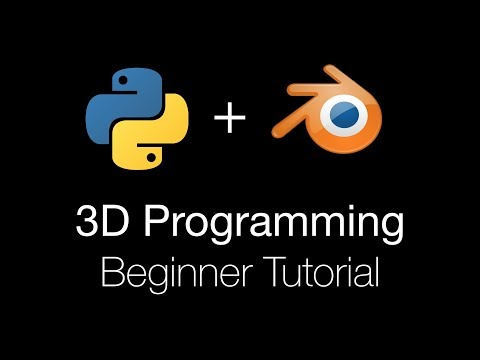

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("rHzf3Dku_cE")

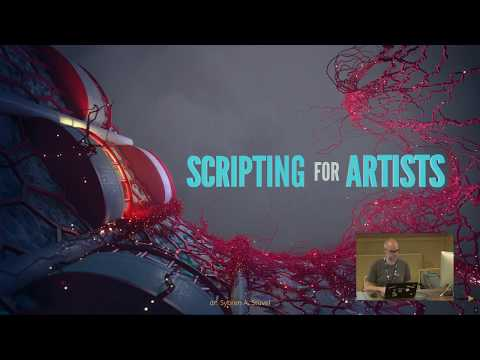

In [3]:
YouTubeVideo("hfYgCwC_4iE")

My immediate application has been to continue the work with POV-Ray (ray tracer) and Rhino (CAD).  Blender has the best Python integration of anything I've yet used.  I've not had occasion to use the ESRI product line up close, even if I got to lead a training for some of its people that time.

My Python framework developed around [making animated GIFs about Flextegrity](Flextegrity_Lattice.ipynb), part of our School's literature, may now be adapted for use within Blender.  

The code above uses the techniques I share in [Generating the FCC](https://github.com/4dsolutions/Python5/blob/master/Generating%20the%20FCC.ipynb).

Looking ahead, [I see using pandas and sqlite3](https://blender.stackexchange.com/questions/51067/using-anaconda-python-3-in-blender-winx64) from inside Blender why not?  The work we do around databases and polyhedrons will pay off inside this capable 3D environment (and using the namespace of XYZ, versus the 4D of the IVM).

The code below results in an exception raised, no surprise there, as we're not inside Blender.  

Run this is scripting mode, and don't forget to change the path to wherever you decide to put your [qrays.py](qrays.py), available here at the school repo.

In [7]:
try: 
    import bpy
except:
    print("We're not in Blender silly")
    raise

from functools import partial

import sys    
sys.path.append("C:\\Users\\Kirby\\School_of_Tomorrow")    
from qrays import Qvector

from itertools import permutations
g = permutations((2,1,1,0))

ORIGIN_IVM = Qvector((0,0,0,0))
# set comprehension in list comprehension
SPOKES_IVM = [Qvector(v) for v in {p for p in g}] 
nucleus = tuple([ORIGIN_IVM])

def next_layer(curr_layer, prev_layer):
    """
    generates a next layer of FCC spheres by trying 12-around-1 
    for each in the current layer (curr_layer) but without keeping
    any duplicates i.e. discarding redundant sphere centers.
    """
    next_layer = set()
    for qv in curr_layer:
        for bv in SPOKES_IVM:
            v_sum = qv + bv
            if (not v_sum in curr_layer 
                and not v_sum in prev_layer):
                next_layer.add(v_sum)
    return sorted(list(next_layer))

nl   = next_layer(nucleus, nucleus) # 1-freq
nnl  = next_layer(nl, nucleus)      # 2-freq
nnnl = next_layer(nnl, nl)          # 3-freq
nnnnl= next_layer(nnnl, nnl)        # 4-freq

def get_xyz(qvectors):
    xyz_vectors = []
    for qv in qvectors:
        xyz_vectors.append(qv.xyz())
    return xyz_vectors

# c6xty_ball = bpy.ops.mesh.primitive_ico_sphere_add
c6xty_ball = partial(bpy.ops.mesh.primitive_ico_sphere_add, subdivisions=1, radius=0.5, enter_editmode=False)


for ball in get_xyz(nl):
    c6xty_ball(location=ball.xyz)

for ball in get_xyz(nnl):
    c6xty_ball(location=ball.xyz)
    
for ball in get_xyz(nnnl):
    c6xty_ball(location=ball.xyz)

for ball in get_xyz(nnnnl):
    c6xty_ball(location=ball.xyz)

We're not in Blender silly


ModuleNotFoundError: No module named 'bpy'